In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [78]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Bring in current master dataset
current_master = pd.read_csv('./data/master_data_fortune_sum.csv')
current_master.columns

Index(['2018rank', 'City', 'State', '2018estimate', '2010Census', 'Change',
       '2016 land area (sq mi)', '2016 land area (sq km)',
       '2016 population density (ppl per sq mi)',
       '2016 population density (ppl per sq km)', 'lat_long', 'st_abbrev',
       'city_st', 'Unnamed: 0.1', 'City_y', 'State_y', 'lat', 'long', 'Metro',
       'County', '2010-12', '2011-12', '2012-12', '2013-12', '2014-12',
       '2015-12', '2016-12', '2017-12', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019_Avg', 'State_abbrev',
       'Universities', 'Stadiums', 'Citystate', 'rank', 'Profits ($M)',
       'Profit Change', 'Assets ($M)', 'Employees', 'Revenue',
       'Percent Revenue Change', 'Market Value'],
      dtype='object')

In [3]:
# Drop unnecessary columns
drop_cols = ['2010-12','2011-12','2012-12','2013-12','2014-12','2015-12','2016-12','2017-12','2018-12']
current_master_clean = current_master.drop(drop_cols, axis=1)
print(current_master_clean.columns)
current_master_clean.shape

Index(['2018rank', 'City', 'State', '2018estimate', '2010Census', 'Change',
       '2016 land area (sq mi)', '2016 land area (sq km)',
       '2016 population density (ppl per sq mi)',
       '2016 population density (ppl per sq km)', 'lat_long', 'st_abbrev',
       'city_st', 'Unnamed: 0.1', 'City_y', 'State_y', 'lat', 'long', 'Metro',
       'County', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019_Avg', 'State_abbrev', 'Universities', 'Stadiums', 'Citystate',
       'rank', 'Profits ($M)', 'Profit Change', 'Assets ($M)', 'Employees',
       'Revenue', 'Percent Revenue Change', 'Market Value'],
      dtype='object')


(242, 38)

In [4]:
# Check for missing values
current_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 38 columns):
2018rank                                   242 non-null float64
City                                       242 non-null object
State                                      242 non-null object
2018estimate                               242 non-null object
2010Census                                 242 non-null object
Change                                     242 non-null object
2016 land area (sq mi)                     242 non-null object
2016 land area (sq km)                     242 non-null object
2016 population density (ppl per sq mi)    242 non-null object
2016 population density (ppl per sq km)    242 non-null object
lat_long                                   242 non-null object
st_abbrev                                  242 non-null object
city_st                                    242 non-null object
Unnamed: 0.1                               242 non-null float64
City_y     

### Join in weather data

In [5]:
weather_data = pd.read_csv('./output/city_and_county_weather_data.csv')
weather_data.columns

Index(['City', 'State', '2019_Avg', 'County', 'Mean_Precip_Jul14_Jun19',
       'Mean_Temp_Jul14_Jun19', 'Metro', 'State_abbrev', 'lat', 'long'],
      dtype='object')

In [6]:
keep_cols = ['City','State','Mean_Temp_Jul14_Jun19','Mean_Precip_Jul14_Jun19']
weather_data_clean = weather_data[keep_cols].set_index(['City','State'])
weather_data_clean.shape

(240, 2)

In [7]:
master = current_master_clean.set_index(['City','State'])
master.shape

(242, 36)

In [8]:
current_master = master.join(weather_data_clean, how="left")
current_master.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 242 entries, (New York, New York) to (Vacaville, California)
Data columns (total 38 columns):
2018rank                                   242 non-null float64
2018estimate                               242 non-null object
2010Census                                 242 non-null object
Change                                     242 non-null object
2016 land area (sq mi)                     242 non-null object
2016 land area (sq km)                     242 non-null object
2016 population density (ppl per sq mi)    242 non-null object
2016 population density (ppl per sq km)    242 non-null object
lat_long                                   242 non-null object
st_abbrev                                  242 non-null object
city_st                                    242 non-null object
Unnamed: 0.1                               242 non-null float64
City_y                                     242 non-null object
State_y                            

### Join in economic data (unemployment)

In [9]:
# Unemployment
unemployment = pd.read_csv('./output/unemployment_rates_by_state.csv')
print(unemployment.shape)
print(unemployment.columns)

(51, 2)
Index(['State', 'unemployment_rate'], dtype='object')


In [10]:
current_master = current_master.reset_index()
current_master.shape

(242, 40)

In [11]:
master_w_unemploy = current_master.merge(unemployment, how="left", on='State')
master_w_unemploy.shape

(242, 41)

In [12]:
# Check join
master_w_unemploy[['State','unemployment_rate']].sort_values('State').head()

,State,unemployment_rate
238,Alabama,3.8
114,Alabama,3.8
106,Alabama,3.8
97,Alabama,3.8
63,Alaska,6.5


### Join in economic data (wages)

In [13]:
wages = pd.read_csv('./output/wages_2018_pct_chg_by_county.csv')
print(wages.shape)
print(wages.columns) 
wages.head()

(159, 3)
Index(['State', 'County', 'wages_2018_12mo_pct_chg'], dtype='object')


,State,County,wages_2018_12mo_pct_chg
0,Alabama,Jefferson County,1.6
1,Alabama,Mobile County,0.6
2,Alabama,Montgomery County,-0.8
3,Alabama,Tuscaloosa County,1.9
4,Arizona,Maricopa County,3.4


In [16]:
current_master = master_w_unemploy.set_index(['State','County'])
wages_for_join = wages.set_index(['State','County'])

master_w_wages = current_master.join(wages_for_join, how='left')
master_w_wages.reset_index().columns

Index(['State', 'County', 'City', '2018rank', '2018estimate', '2010Census',
       'Change', '2016 land area (sq mi)', '2016 land area (sq km)',
       '2016 population density (ppl per sq mi)',
       '2016 population density (ppl per sq km)', 'lat_long', 'st_abbrev',
       'city_st', 'Unnamed: 0.1', 'City_y', 'State_y', 'lat', 'long', 'Metro',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019_Avg',
       'State_abbrev', 'Universities', 'Stadiums', 'Citystate', 'rank',
       'Profits ($M)', 'Profit Change', 'Assets ($M)', 'Employees', 'Revenue',
       'Percent Revenue Change', 'Market Value', 'Mean_Temp_Jul14_Jun19',
       'Mean_Precip_Jul14_Jun19', 'unemployment_rate',
       'wages_2018_12mo_pct_chg'],
      dtype='object')

### Join in Commute Scores

In [108]:
commuting = pd.read_csv('./data/Rent_Modality_Scores.csv')
commuting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
2019_Avg         96 non-null float64
Citystate        96 non-null object
Walk Score       96 non-null float64
Transit Score    88 non-null float64
Bike Score       95 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


In [109]:
# Create City, State columns for merge to master
commuting['City'] = commuting['Citystate'].apply(lambda x: x.split('_')[0])
commuting['State'] = commuting['Citystate'].apply(lambda x: x.split('_')[1])

commuting = commuting.drop(['Citystate', '2019_Avg'], axis=1)
commuting.head()

,Walk Score,Transit Score,Bike Score,City,State
0,80.4,65.1,49.8,Newark,New Jersey
1,26.8,23.0,40.4,Jacksonville,Florida
2,44.2,36.1,48.6,Fremont,California
3,48.7,36.9,47.9,Houston,Texas
4,63.7,57.3,49.2,Honolulu,Hawaii


In [110]:
commuting_indexed = commuting.set_index(['City','State'])
master_indexed = master_w_wages.set_index(['City','State'])

master_final = master_indexed.join(commuting_indexed, how='left')
master_final.head()

,,County,2018rank,2018estimate,2010Census,Change,2016 land area (sq mi),2016 land area (sq km),2016 population density (ppl per sq mi),2016 population density (ppl per sq km),lat_long,...,Revenue,Percent Revenue Change,Market Value,Mean_Temp_Jul14_Jun19,Mean_Precip_Jul14_Jun19,unemployment_rate,wages_2018_12mo_pct_chg,Walk Score,Transit Score,Bike Score
City,State,,,,,,,,,,,,,,,,,,,,,
Abilene,Texas,Taylor County,225.0,"122,999","117,063",5.07%,106.7,276.4,"1,146",442,"32.4545, -99.7381",...,NaN,NaN,NaN,65.4,157.88,3.7,2.5,NaN,NaN,NaN
Akron,Ohio,Summit County,120.0,"198,006","199,110",-0.55%,62,160.6,"3,188","1,231","41.0805, -81.5214",...,29004.0,5.1,22567.0,52.3,221.99,4.6,0.0,NaN,NaN,NaN
Albuquerque,New Mexico,Bernalillo County,32.0,"560,218","545,852",2.63%,188.2,487.4,"2,972","1,147","35.1056, -106.6474",...,NaN,NaN,NaN,58.9,45.40,5.0,0.9,42.7,30.0,60.4
Alexandria,Virginia,Alexandria City,159.0,"160,530","139,966",14.69%,15,38.8,"10,387","4,010","38.8201, -77.0841",...,NaN,NaN,NaN,58.0,225.08,2.8,-2.0,NaN,NaN,NaN
Allen,Texas,Collin County,301.0,"103,383","84,246",22.72%,27.1,70.2,"3,715","1,434","33.0997, -96.6631",...,NaN,NaN,NaN,65.4,250.30,3.7,4.2,NaN,NaN,NaN


In [111]:
# Check for Missing Values
master_final = master_final.reset_index()
master_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 45 columns):
City                                       243 non-null object
State                                      243 non-null object
County                                     243 non-null object
2018rank                                   243 non-null float64
2018estimate                               243 non-null object
2010Census                                 243 non-null object
Change                                     243 non-null object
2016 land area (sq mi)                     243 non-null object
2016 land area (sq km)                     243 non-null object
2016 population density (ppl per sq mi)    243 non-null object
2016 population density (ppl per sq km)    243 non-null object
lat_long                                   243 non-null object
st_abbrev                                  243 non-null object
city_st                                    243 non-null object
Unnamed: 0.1

In [112]:
# Export master dataset
master_final.to_csv('./output/master_data_fortune_sum_weather_econ_commute_scores.csv')

## Check for Linear Relationships

In [113]:
removed_outliers = master_final[master_final["2019_Avg"] < 2000].reset_index()

In [114]:
removed_outliers.head()

,index,City,State,County,2018rank,2018estimate,2010Census,Change,2016 land area (sq mi),2016 land area (sq km),...,Revenue,Percent Revenue Change,Market Value,Mean_Temp_Jul14_Jun19,Mean_Precip_Jul14_Jun19,unemployment_rate,wages_2018_12mo_pct_chg,Walk Score,Transit Score,Bike Score
0,0,Abilene,Texas,Taylor County,225.0,"122,999","117,063",5.07%,106.7,276.4,...,NaN,NaN,NaN,65.4,157.88,3.7,2.5,NaN,NaN,NaN
1,1,Akron,Ohio,Summit County,120.0,"198,006","199,110",-0.55%,62,160.6,...,29004.0,5.1,22567.0,52.3,221.99,4.6,0.0,NaN,NaN,NaN
2,2,Albuquerque,New Mexico,Bernalillo County,32.0,"560,218","545,852",2.63%,188.2,487.4,...,NaN,NaN,NaN,58.9,45.40,5.0,0.9,42.7,30.0,60.4
3,3,Alexandria,Virginia,Alexandria City,159.0,"160,530","139,966",14.69%,15,38.8,...,NaN,NaN,NaN,58.0,225.08,2.8,-2.0,NaN,NaN,NaN
4,4,Allen,Texas,Collin County,301.0,"103,383","84,246",22.72%,27.1,70.2,...,NaN,NaN,NaN,65.4,250.30,3.7,4.2,NaN,NaN,NaN


In [115]:
removed_outliers.columns

# Clean
removed_outliers['Change'] = removed_outliers['Change'].apply(lambda x: x[:-1])
removed_outliers['Change'] = removed_outliers['Change'].astype('float')
removed_outliers["2016 population density (ppl per sq mi)"] = removed_outliers["2016 population density (ppl per sq mi)"].apply(lambda x: ''.join(x.split(',')))
removed_outliers["2016 population density (ppl per sq mi)"] = removed_outliers["2016 population density (ppl per sq mi)"].astype('float')

cols_city_data = ['2019_Avg','Change','2016 population density (ppl per sq mi)']
removed_outliers[cols_city_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
2019_Avg                                   216 non-null float64
Change                                     216 non-null float64
2016 population density (ppl per sq mi)    216 non-null float64
dtypes: float64(3)
memory usage: 5.1 KB


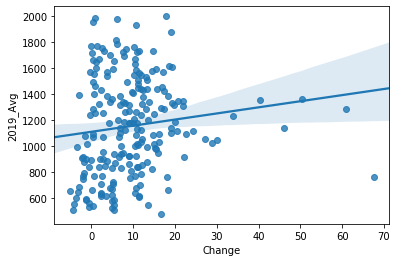

In [116]:
x = removed_outliers['Change']
y = removed_outliers['2019_Avg']
sns.regplot(x, y)

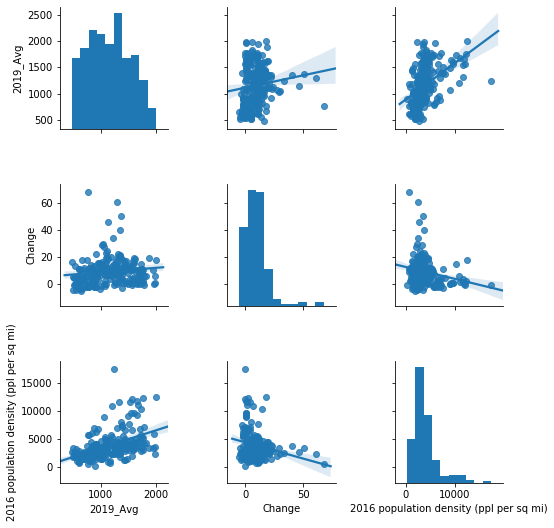

In [117]:
sns.pairplot(removed_outliers[cols_city_data], kind='reg')

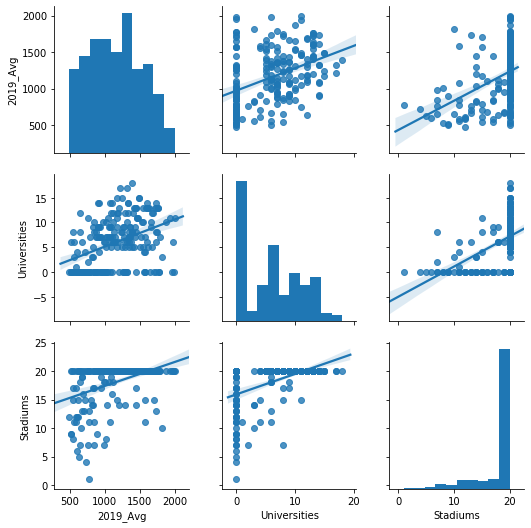

In [57]:
removed_outliers.columns
cols_random = ['2019_Avg','Universities','Stadiums']
sns.pairplot(removed_outliers[cols_random], kind='reg', dropna=True)

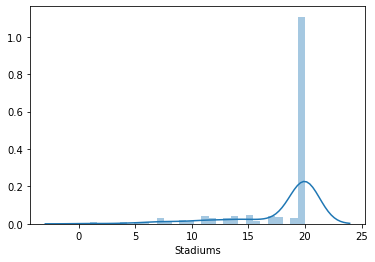

In [58]:
sns.distplot(removed_outliers['Stadiums'])

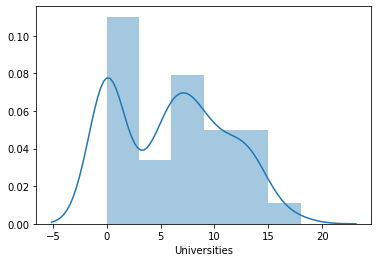

In [59]:
sns.distplot(removed_outliers['Universities'])

/Users/gfidanli/anaconda3/envs/python3_default/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gfidanli/anaconda3/envs/python3_default/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


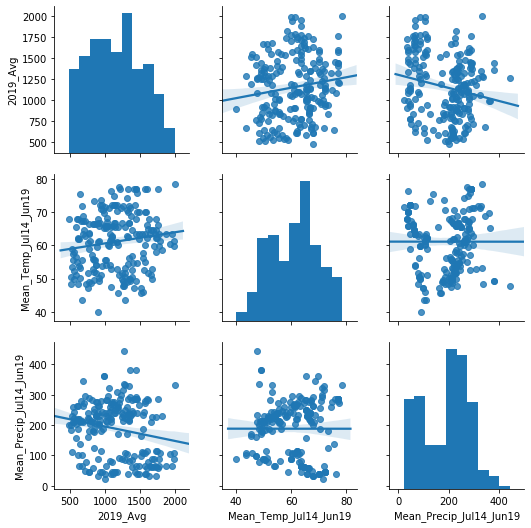

In [60]:
# Temperature Data
cols_temp = ['2019_Avg','Mean_Temp_Jul14_Jun19','Mean_Precip_Jul14_Jun19']
sns.pairplot(removed_outliers[cols_temp], kind='reg', dropna=True)

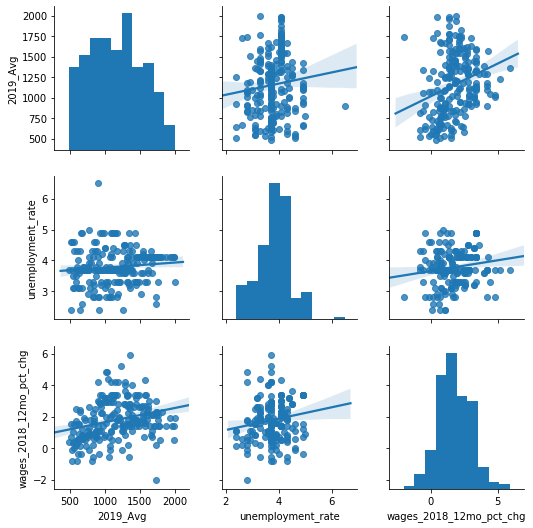

In [61]:
# Economic Data
cols_econ = ['2019_Avg','unemployment_rate','wages_2018_12mo_pct_chg']
sns.pairplot(removed_outliers[cols_econ], kind='reg', dropna=True)

/Users/gfidanli/anaconda3/envs/python3_default/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gfidanli/anaconda3/envs/python3_default/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


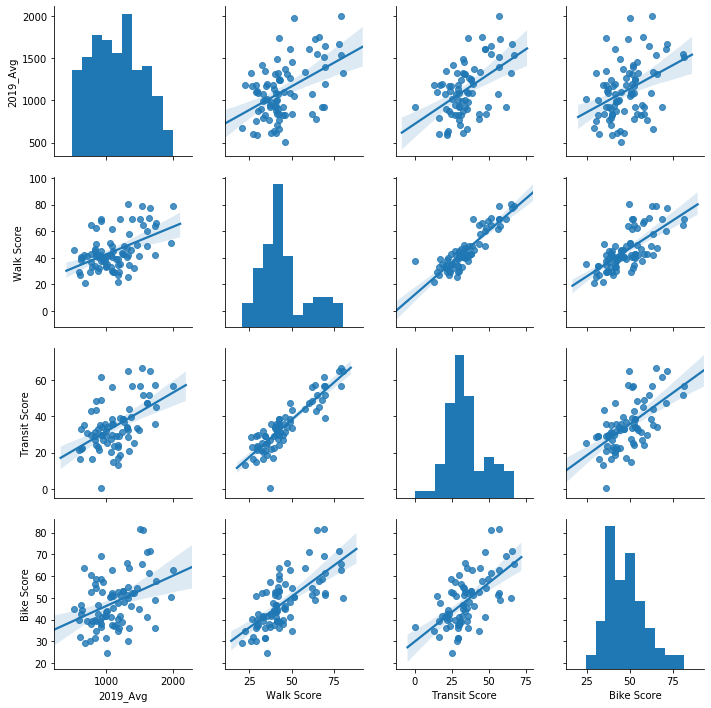

In [118]:
# Commute Data
cols_commute = ['2019_Avg','Walk Score','Transit Score', 'Bike Score']
sns.pairplot(removed_outliers[cols_commute], kind='reg', dropna=True)

## Linear Regression
* Using as many data points as possible - remove fields with a large number of missing data

In [120]:
# Check columns with null values
removed_outliers.isnull().any()
# removed_outliers.info()

# removed_outliers_dropped = removed_outliers.drop(['rank',"Profits ($M)","Profit Change","Assets ($M)","Employees","Revenue","Percent Revenue Change","Market Value"], axis=1)
# removed_outliers_deduped = removed_outliers_dropped.dropna()
removed_outliers_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 214
Data columns (total 34 columns):
State                                      213 non-null object
County                                     213 non-null object
City                                       213 non-null object
2018rank                                   213 non-null float64
2018estimate                               213 non-null object
2010Census                                 213 non-null object
Change                                     213 non-null float64
2016 land area (sq mi)                     213 non-null object
2016 land area (sq km)                     213 non-null object
2016 population density (ppl per sq mi)    213 non-null float64
2016 population density (ppl per sq km)    213 non-null object
lat_long                                   213 non-null object
st_abbrev                                  213 non-null object
city_st                                    213 non-null object
Unnamed: 0

In [86]:
X = removed_outliers_deduped[
    ['Change', "2016 population density (ppl per sq mi)", 
     'Mean_Temp_Jul14_Jun19', 'Mean_Precip_Jul14_Jun19', 'unemployment_rate', 'wages_2018_12mo_pct_chg']].values
x_cols = ['Change', "2016 population density (ppl per sq mi)", 
     'Mean_Temp_Jul14_Jun19', 'Mean_Precip_Jul14_Jun19', 'unemployment_rate', 'wages_2018_12mo_pct_chg']
y = removed_outliers_deduped['2019_Avg'].values

In [79]:
# Train/Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
# Train Model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
coeff_df = pd.DataFrame(regressor.coef_, x_cols, columns=['Coefficient'])  
coeff_df

,Coefficient
Change,4.158740
2016 population density (ppl per sq mi),0.068102
Mean_Temp_Jul14_Jun19,3.794067
Mean_Precip_Jul14_Jun19,-0.480028
unemployment_rate,13.157343
wages_2018_12mo_pct_chg,77.835691


In [88]:
# Predict on test dataset
y_pred = regressor.predict(X_test)

In [121]:
# Check prediction
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,1025.5,1452.448361
1,1531.3,1301.729975
2,1338.3,896.249920
3,977.2,1141.978330
4,858.0,1168.513380


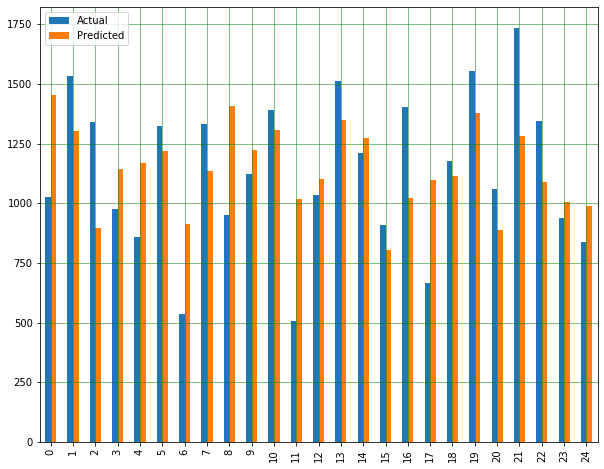

In [93]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [96]:
# Check accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 228.83317144275344
Mean Squared Error: 74640.76233305378
Root Mean Squared Error: 273.2046162367206


In [99]:
removed_outliers_deduped['2019_Avg'].mean()

1154.8436619718311

In [100]:
print(273/1154)

0.2365684575389948


In [98]:
# R Squared
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

NameError: name 'model' is not defined

## Linear Regression
* Try to find a more accurate prediction using all possible fields (dropping missing values)

In [122]:
# Check columns with null values
removed_outliers.isnull().any()
# removed_outliers.info()

removed_outliers_dropped = removed_outliers.drop(['rank',"Profits ($M)","Profit Change","Assets ($M)","Employees","Revenue","Percent Revenue Change","Market Value"], axis=1)
removed_outliers_deduped = removed_outliers_dropped.dropna()
removed_outliers_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 2 to 205
Data columns (total 38 columns):
index                                      74 non-null int64
City                                       74 non-null object
State                                      74 non-null object
County                                     74 non-null object
2018rank                                   74 non-null float64
2018estimate                               74 non-null object
2010Census                                 74 non-null object
Change                                     74 non-null float64
2016 land area (sq mi)                     74 non-null object
2016 land area (sq km)                     74 non-null object
2016 population density (ppl per sq mi)    74 non-null float64
2016 population density (ppl per sq km)    74 non-null object
lat_long                                   74 non-null object
st_abbrev                                  74 non-null object
city_st                   

In [123]:
x_cols = ['Change', "2016 population density (ppl per sq mi)", 
     'Mean_Temp_Jul14_Jun19', 'Mean_Precip_Jul14_Jun19', 
     'unemployment_rate', 'wages_2018_12mo_pct_chg', 'Walk Score', 'Transit Score', 'Bike Score']

X = removed_outliers_deduped[x_cols].values

y = removed_outliers_deduped['2019_Avg'].values

In [124]:
# Train/Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [125]:
# Train Model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
coeff_df = pd.DataFrame(regressor.coef_, x_cols, columns=['Coefficient'])  
coeff_df

,Coefficient
Change,23.941533
2016 population density (ppl per sq mi),0.081982
Mean_Temp_Jul14_Jun19,0.646670
Mean_Precip_Jul14_Jun19,0.261373
unemployment_rate,-55.115424
wages_2018_12mo_pct_chg,1.406735
Walk Score,-8.886510
Transit Score,9.490856
Bike Score,1.260208


In [127]:
# Predict on test dataset
y_pred = regressor.predict(X_test)

In [128]:
# Check prediction
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [129]:
df1

,Actual,Predicted
0,1324.1,1578.293620
1,826.0,1183.442556
2,916.7,972.465019
3,1087.0,1187.014726
4,1137.8,1110.885568
5,1346.8,1267.811883
6,977.2,1313.919451
7,1097.4,1068.735981
8,873.9,972.662528
9,1392.0,1168.746239


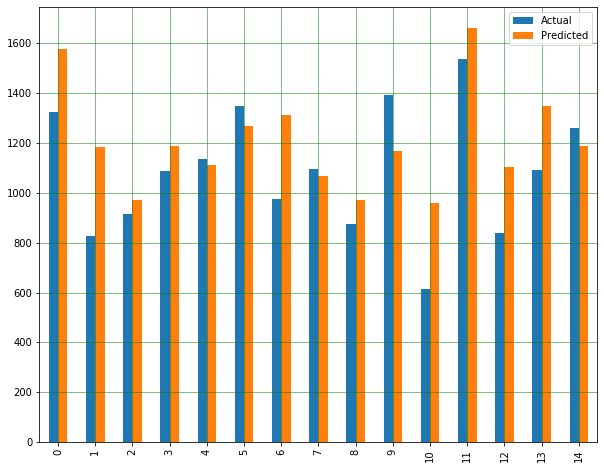

In [130]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [131]:
# Check accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 175.08296073709587
Mean Squared Error: 44182.52536388438
Root Mean Squared Error: 210.1963971239383


In [132]:
removed_outliers_deduped['2019_Avg'].mean()

1124.3986486486488

In [133]:
print(210/1154)

0.18197573656845753
